In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [64]:
from sklearn.linear_model import LinearRegression

In [85]:
from numpy import nan
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [10]:
data = pd.read_csv("C:/Users/admin/Videos/london_merged.csv", parse_dates=[0], index_col=[0])

In [11]:
data.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [12]:
df_day = data.resample('D').sum()

In [13]:
df_day.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0


In [16]:
df_day['day'] = df_day.index.day 

In [34]:
data = df_day.drop(['day'], axis=1)

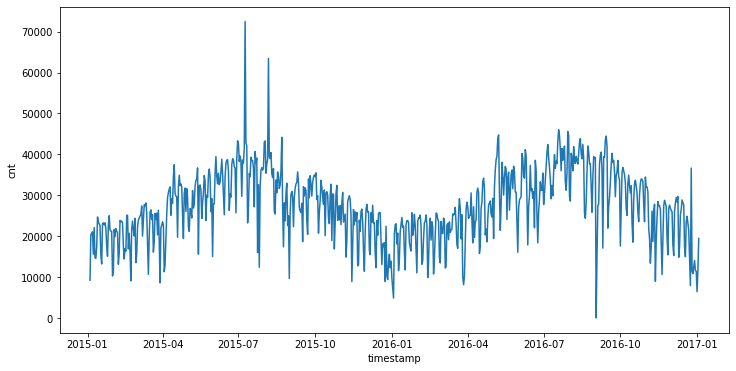

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_day.index, y='cnt', data=df_day)

In [35]:
corrmat = data.corr()

In [36]:
corrmat 

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
cnt,1.000000,0.693976,0.689085,-0.452029,-0.168010,-0.517992,-0.151453,-0.285887,-0.336373
t1,0.693976,1.000000,0.992445,-0.294016,0.041478,-0.193551,-0.042963,-0.005217,-0.300607
t2,0.689085,0.992445,1.000000,-0.274234,-0.004077,-0.198264,-0.040940,-0.008789,-0.300655
hum,-0.452029,-0.294016,-0.274234,1.000000,-0.142992,0.569014,0.052115,0.042426,0.430339
wind_speed,-0.168010,0.041478,-0.004077,-0.142992,1.000000,0.207234,-0.000469,0.012800,0.018024
weather_code,-0.517992,-0.193551,-0.198264,0.569014,0.207234,1.000000,0.026796,0.077578,0.193067
is_holiday,-0.151453,-0.042963,-0.040940,0.052115,-0.000469,0.026796,1.000000,-0.094476,-0.030970
is_weekend,-0.285887,-0.005217,-0.008789,0.042426,0.012800,0.077578,-0.094476,1.000000,0.002159
season,-0.336373,-0.300607,-0.300655,0.430339,0.018024,0.193067,-0.030970,0.002159,1.000000


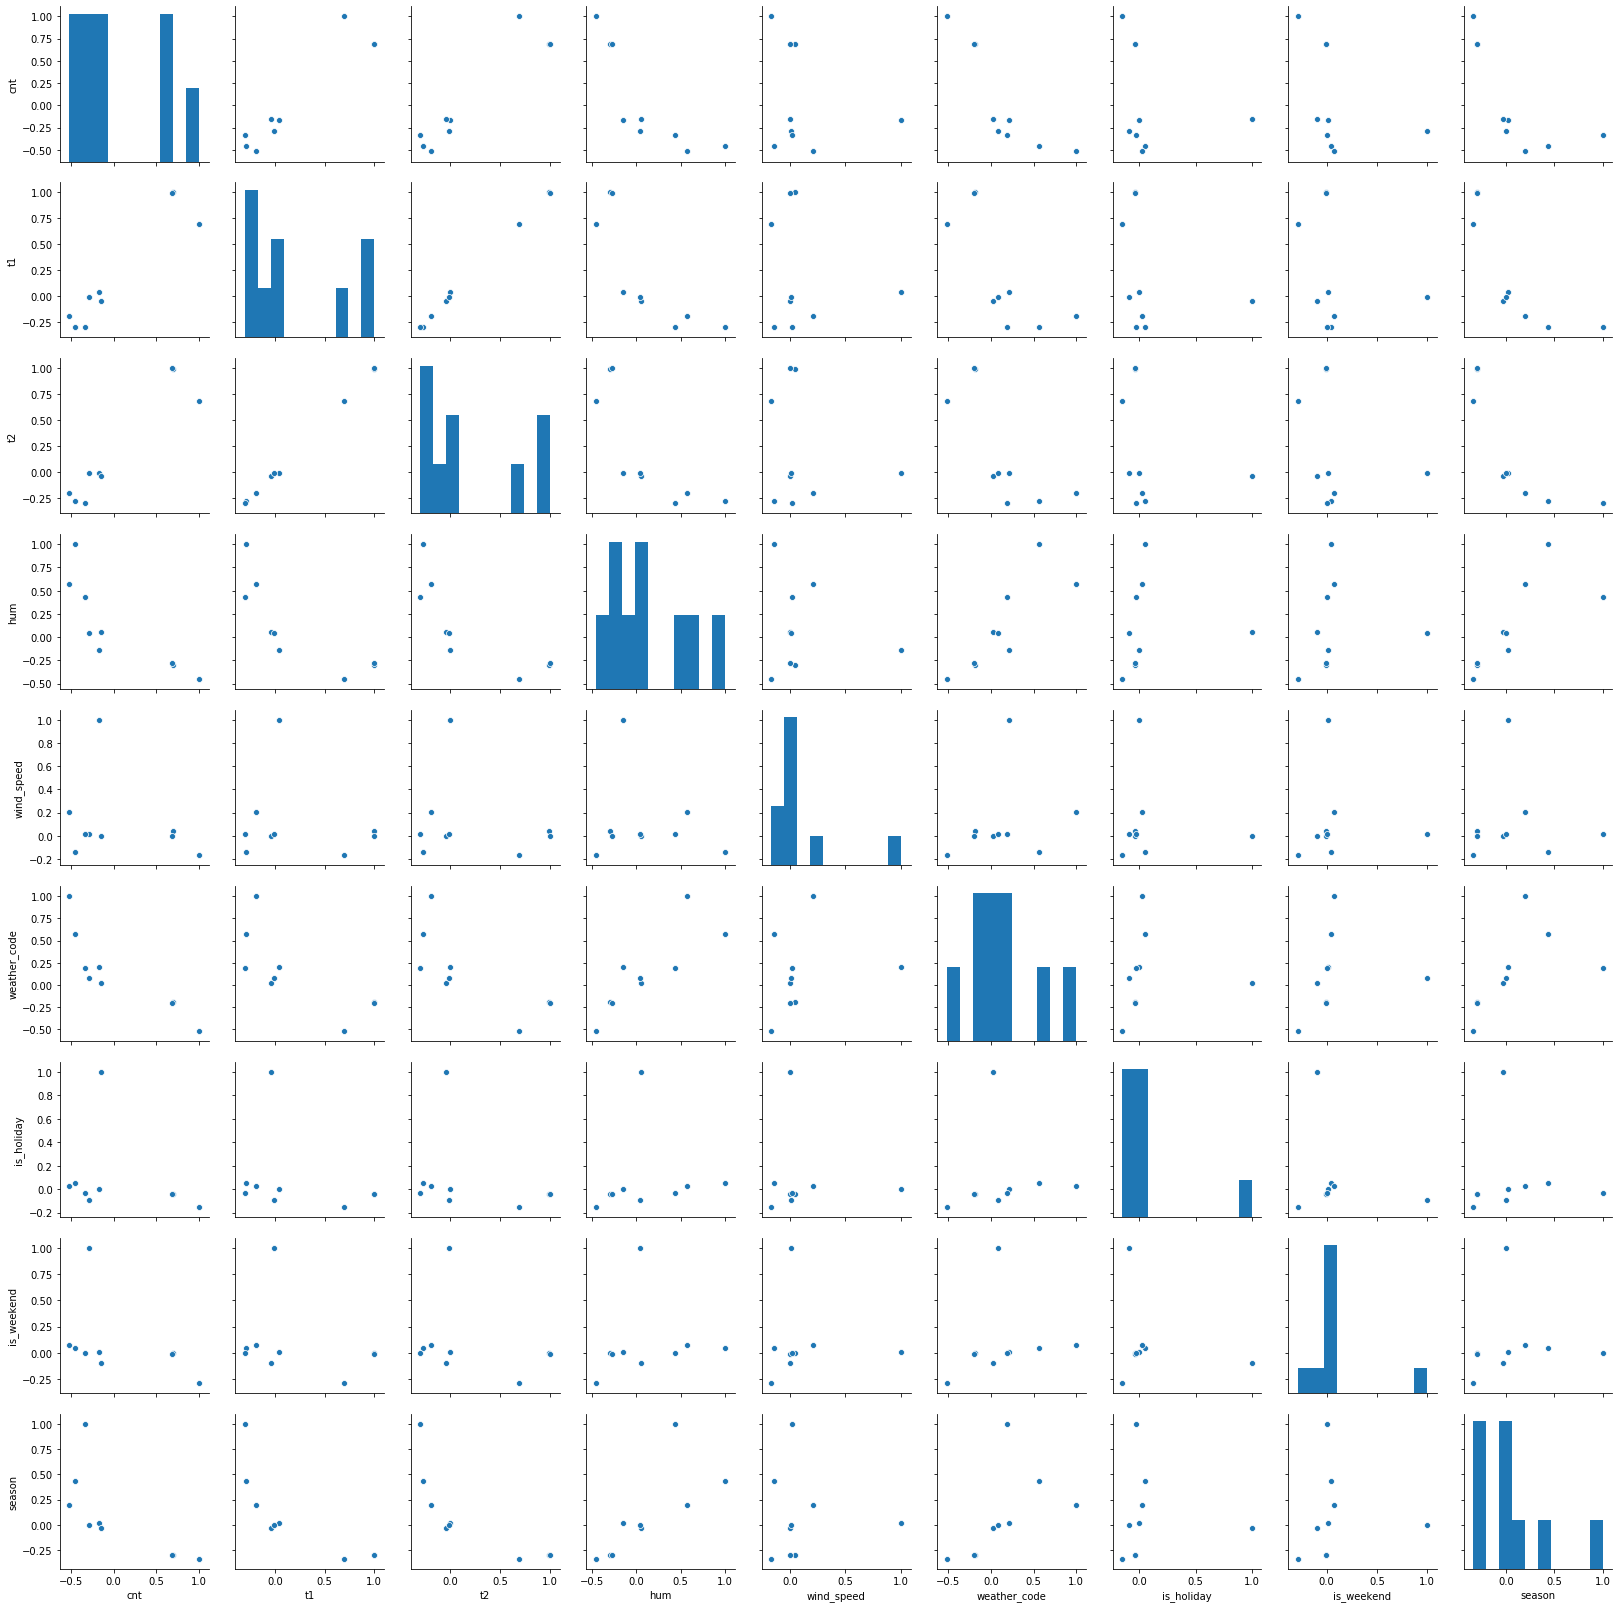

In [37]:
sns.pairplot(corrmat)

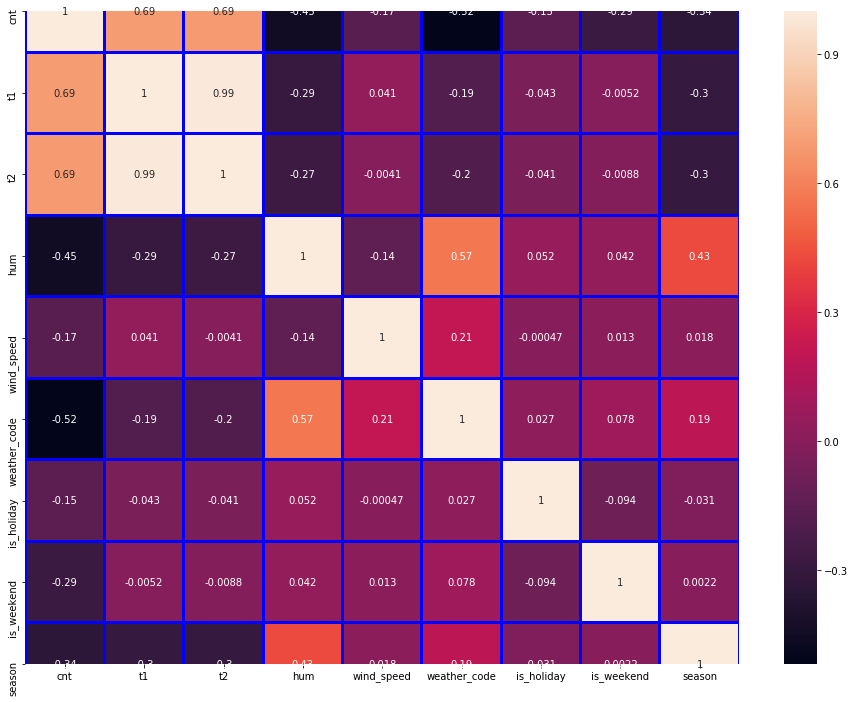

In [44]:
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, linewidth=2, linecolor='blue', annot=True)

## identifying high correlation and multicollinearity problem 
## 1) weather code high negative correlation
##  2) t1 is highly correlated with t2

In [90]:
data.head(3)

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,season
timestamp,,,,,,,
2015-01-04,9234,59.5,2262.5,180.0,0.0,24.0,72.0
2015-01-05,20372,193.0,1927.5,212.5,0.0,0.0,72.0
2015-01-06,20613,188.5,1893.5,384.0,0.0,0.0,72.0


In [47]:
data.shape

(731, 7)

In [48]:
x = np.array(data.drop(['cnt'],axis=1))

In [50]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,59.5,2262.5,180.0,0.0,24.0,72.0
1,193.0,1927.5,212.5,0.0,0.0,72.0
2,188.5,1893.5,384.0,0.0,0.0,72.0
3,171.5,1796.5,454.5,0.0,0.0,69.0
4,234.0,1903.5,491.5,0.0,0.0,72.0
...,...,...,...,...,...,...
726,78.5,2368.5,216.0,0.0,0.0,72.0
727,178.5,2183.0,319.5,0.0,24.0,72.0
728,168.0,2122.5,339.0,0.0,24.0,72.0
729,89.5,1995.5,268.0,24.0,0.0,72.0


In [51]:
y = np.array(data.cnt)

In [52]:
pd.DataFrame(y)

,0
0,9234
1,20372
2,20613
3,21064
4,15601
...,...
726,11566
727,11424
728,6421
729,11823


In [53]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [80]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((584, 6), (584,), (147, 6), (147,))

In [81]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
lr_confidence = lr.score(x_test, y_test)
print('confidence:', lr_confidence)

confidence: 0.7352900446012092


In [83]:
model_prediction = lr.predict(x_test)

In [86]:
model_error = mean_squared_error(model_prediction, y_test)

In [87]:
np.sqrt(model_error)

4341.559288662398

In [88]:
pd.DataFrame(model_prediction)

,0
0,23052.569027
1,28582.693425
2,22677.842346
3,21433.730252
4,23273.399115
...,...
142,21335.950160
143,32751.031192
144,20088.542497
145,31880.601979


In [91]:
test = pd.DataFrame(data=y_test, columns=['True Value'])
prediction = pd.DataFrame(data=model_prediction, columns=['LR'])

In [92]:
test.head(3)

,True Value
0,25186
1,29429
2,15815


In [93]:
LR_model = pd.concat([test, prediction], axis=1)

In [94]:
LR_model.head(3)

,True Value,LR
0,25186,23052.569027
1,29429,28582.693425
2,15815,22677.842346


In [96]:
LR_model.to_excel("C:/Users/admin/Videos/LR_model.xlsx")